In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv("C:\\Users\\Arnav Singla\\Downloads\\voyage_ai_synthetic_travel_data.csv")

In [27]:
#data cleaning and pre processing 
df.dtypes

User_ID                      str
Trip_Frequency           float64
Avg_Booking_Value        float64
Destination_Diversity    float64
Session_Duration_Min     float64
Search_Count             float64
dtype: object

In [28]:
print(df.head()) 

  User_ID  Trip_Frequency  Avg_Booking_Value  Destination_Diversity  \
0  U00001             7.0           147522.0                    5.0   
1  U00002             5.0            90976.0                    1.0   
2  U00003             5.0            96212.0                    4.0   
3  U00004             8.0            94838.0                    2.0   
4  U00005             7.0           101396.0                   20.0   

   Session_Duration_Min  Search_Count  
0                 31.84          77.0  
1                 18.05          15.0  
2                 26.08          76.0  
3                  5.37          91.0  
4                 48.57          89.0  


In [29]:
#info
print(df.info())

<class 'pandas.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   User_ID                5000 non-null   str    
 1   Trip_Frequency         4750 non-null   float64
 2   Avg_Booking_Value      4750 non-null   float64
 3   Destination_Diversity  4750 non-null   float64
 4   Session_Duration_Min   4750 non-null   float64
 5   Search_Count           4750 non-null   float64
dtypes: float64(5), str(1)
memory usage: 234.5 KB
None


In [30]:
#null value count
df.isnull().sum()

User_ID                    0
Trip_Frequency           250
Avg_Booking_Value        250
Destination_Diversity    250
Session_Duration_Min     250
Search_Count             250
dtype: int64

In [31]:
#drop user id
df = df.drop(columns=['User_ID'])

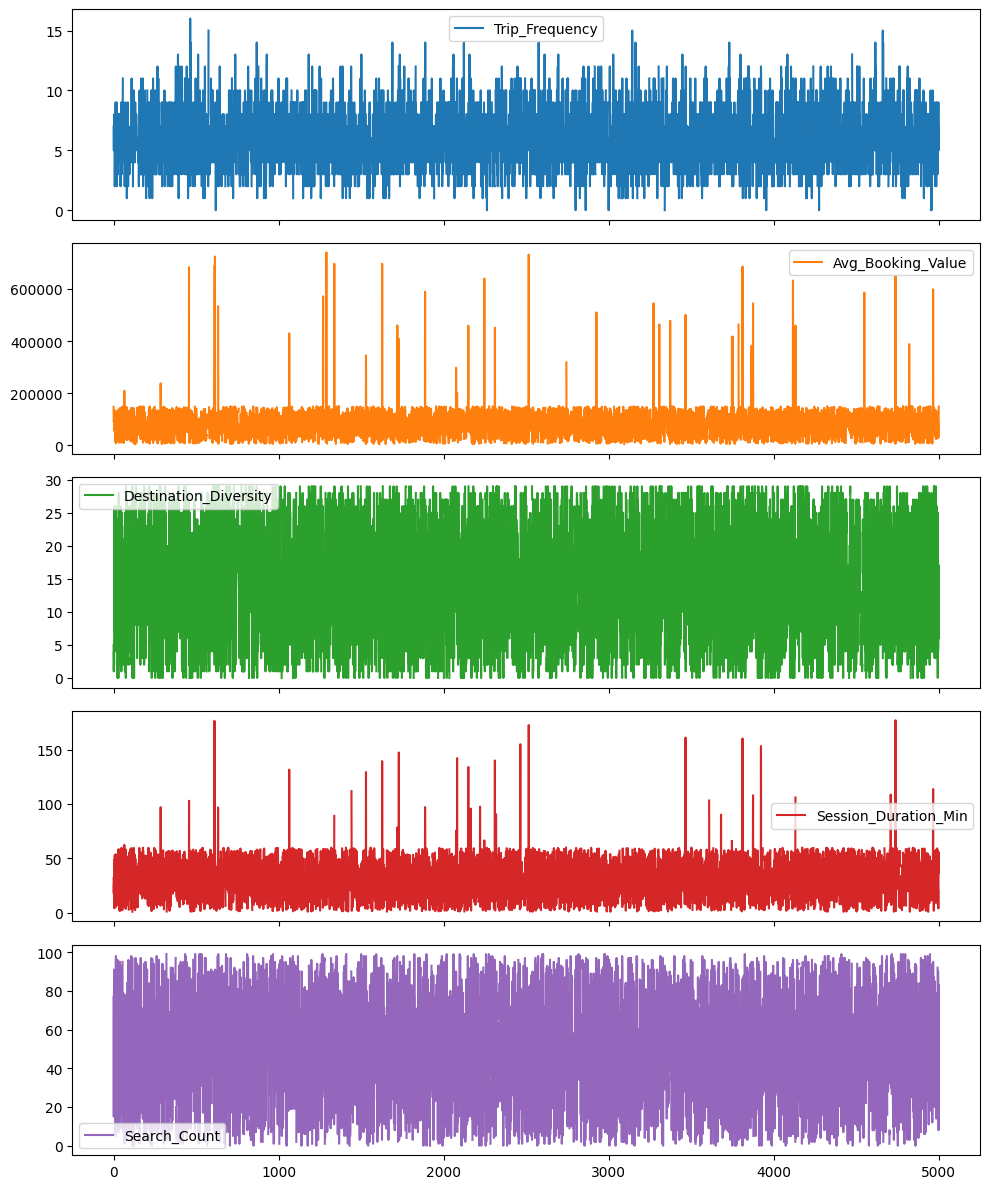

In [32]:
#plot each column values to identify outliers
df.plot(subplots=True, figsize=(10, 12), layout=(-1, 1))
plt.tight_layout()
plt.show()

In [35]:
#fill  null values with median imputation
for col in df.columns:
    if df[col].dtype != "object":
        df[col] = df[col].fillna(df[col].median())




In [36]:
df.isnull().sum()


Trip_Frequency           0
Avg_Booking_Value        0
Destination_Diversity    0
Session_Duration_Min     0
Search_Count             0
dtype: int64

In [40]:
#manage Outliers -> from graphs , booking value and session duration have outliers
#using IQR (Quartiles method)
Q1 = df['Avg_Booking_Value'].quantile(0.25)
Q3 = df['Avg_Booking_Value'].quantile(0.75)

IQR = Q1-Q3
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df['Avg_Booking_Value'] = df['Avg_Booking_Value'].clip(lower, upper)

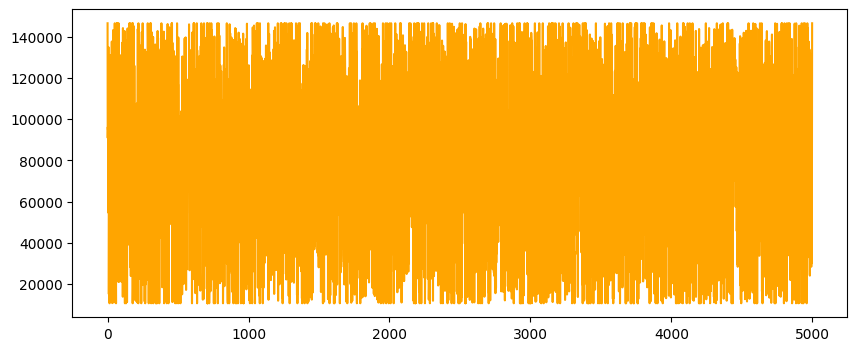

In [44]:
df['Avg_Booking_Value'].plot(figsize=(10, 4),color='Orange')
plt.show()

In [45]:
#session duration outliers managing
#IQR 
Q1 = df['Session_Duration_Min'].quantile(0.25)
Q3 = df['Session_Duration_Min'].quantile(0.75)

IQR = Q1-Q3
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df['Session_Duration_Min'] = df['Session_Duration_Min'].clip(lower, upper)


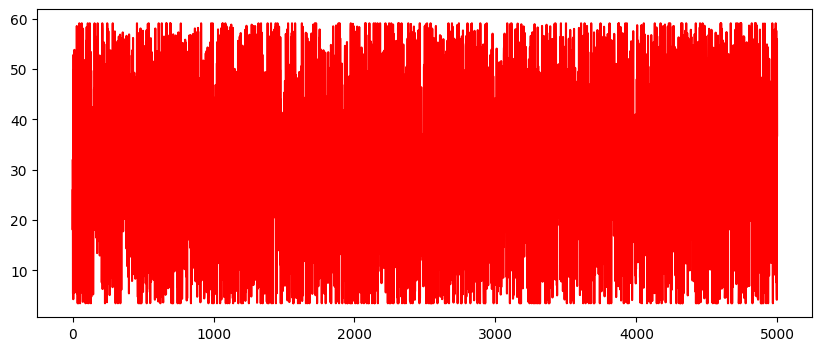

In [46]:
df['Session_Duration_Min'].plot(figsize=(10, 4),color='Red')
plt.show()